# ECE 219: Project 2 - Clustering

In [126]:
import numpy as np
import random
np.random.seed(42)
import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import math 


from sklearn.datasets import fetch_20newsgroups

categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

newsgroups_data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

In [2]:
#QUESTION 1
def tokenize(text):
    tokens = nltk.tokenize.word_tokenize(text)
    tokens = [token.strip(string.punctuation) for token in tokens if token.isalnum()]
    return tokens

tfidfVectorizer = TfidfVectorizer(min_df=3, stop_words='english', tokenizer = tokenize)
tfidfVectors = tfidfVectorizer.fit_transform(newsgroups_data.data)
print (tfidfVectors.shape[0], tfidfVectors.shape[1])
print ('Dimensions of TF-IDF matrix: ', tfidfVectors.shape)

7882 15736
Dimensions of TF-IDF matrix:  (7882, 15736)


In [138]:
#QUESTION 2 AND 3
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
## opt1
vectorFunc = np.vectorize(lambda x : int(x / 4))

## opt2
def new(x):
    return int(x / 4)
vectorFunc = np.vectorize(new)
    
    
labels = vectorFunc(newsgroups_data.target)

cur_k = 2
km = KMeans(n_clusters = cur_k, init = 'k-means++')
km.fit(tfidfVectors)

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
%matplotlib inline

def evaluate(labels, kmeans_labels_):
    eval_rest = []
    eval_rest.append(metrics.homogeneity_score(labels, kmeans_labels_))
    print("Homogeneity: %0.3f" % eval_rest[-1])
    eval_rest.append(metrics.completeness_score(labels, kmeans_labels_))
    print("Completeness: %0.3f" % eval_rest[-1])
    eval_rest.append(metrics.v_measure_score(labels, kmeans_labels_))
    print("V-measure: %0.3f" % eval_rest[-1])
    eval_rest.append(metrics.adjusted_rand_score(labels, kmeans_labels_))
    print("Adjusted Rand-Index: %.3f" % eval_rest[-1])
    eval_rest.append(metrics.adjusted_mutual_info_score(labels, kmeans_labels_))
    print("Adjusted Mutual Information Score: %.3f" % eval_rest[-1])
    print("Contingency Table: \n", confusion_matrix(labels, kmeans_labels_))
    return eval_rest
   
tmp = evaluate(labels, km.labels_)


Homogeneity: 0.400
Completeness: 0.441
V-measure: 0.419
Adjusted Rand-Index: 0.402
Adjusted Mutual Information Score: 0.400
Contingency Table: 
 [[1401 2502]
 [3939   40]]


[0.39978566189364156,
 0.44070623330413744,
 0.4192498088055657,
 0.40233522610619676,
 0.39973071009164374]

In [152]:
x = [1,2,3]
vectorFunc = np.vectorize(lambda x : int(x / 4))
vectorFunc(x)

array([0, 0, 0])

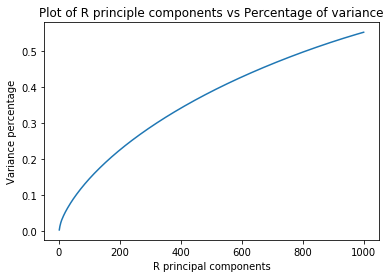

In [4]:
#  QUESTION 4

from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

svd = TruncatedSVD(n_components=1000, random_state=42)
tfidfVectors_truncated = svd.fit_transform(tfidfVectors.toarray())
variances = svd.explained_variance_ratio_

percentages = np.zeros(1000)

components = range(1, 1001)
for r in components:
    percentages[r-1] = variances[:r].sum()
    #print(r)

plt.plot(components, percentages)
plt.xlabel('R principal components')
plt.ylabel('Variance percentage')
plt.title('Plot of R principle components vs Percentage of variance')

plt.show()

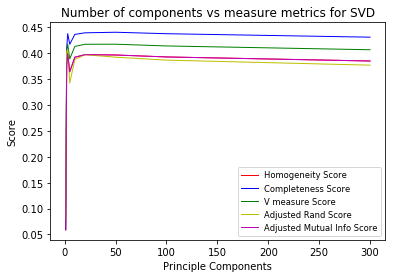

In [5]:
### QUESTION 5
# SVD Part

n_components = [1,2,3,5,10,20,50,100,300]
svd_scores = [[],[],[],[],[]]

for i in range(0,len(n_components)):
    k = n_components[i]
    svd = TruncatedSVD(n_components=k, random_state=42)
    tfidfVectors_trunc = svd.fit_transform(tfidfVectors.toarray())
    km = KMeans(n_clusters = 2, init = 'k-means++', random_state=0, max_iter = 1000 , n_init = 30 ).fit(tfidfVectors_trunc)
    
    svd_scores[0].append(metrics.homogeneity_score(labels, km.labels_))
    #print(homogeneity)
    svd_scores[1].append(metrics.completeness_score(labels, km.labels_))
    #print(completeness)
    svd_scores[2].append(metrics.v_measure_score(labels, km.labels_))
    #print(vmeasure)
    svd_scores[3].append(metrics.adjusted_rand_score(labels, km.labels_))
    #print(Arandindex)
    svd_scores[4].append(metrics.adjusted_mutual_info_score(labels, km.labels_))
    #print(Amutualinfo)
    
#print("homogeneity: \n" , homogeneity)
#print("completeness: \n" , completeness)
#print(vmeasure)
#print(Arandindex)
#print(Amutualinfo)
    
plt.figure()
color = ['r', 'b', 'g', 'y', 'm']
plt.plot(n_components,svd_scores[0], color=color[0], lw=1, label='Homogeneity Score')
plt.plot(n_components, svd_scores[1], color=color[1], lw=1, label='Completeness Score')
plt.plot(n_components, svd_scores[2], color=color[2], lw=1, label='V measure Score')
plt.plot(n_components, svd_scores[3], color=color[3], lw=1, label='Adjusted Rand Score')
plt.plot(n_components, svd_scores[4], color=color[4], lw=1, label='Adjusted Mutual Info Score')
#pyplot.xlim([0.0, 350])
#pyplot.ylim([0.0, 1.0])
plt.xlabel('Principle Components')
plt.ylabel('Score')
plt.title('Number of components vs measure metrics for SVD')
plt.legend(loc='bottom right', fontsize='small')
plt.show()

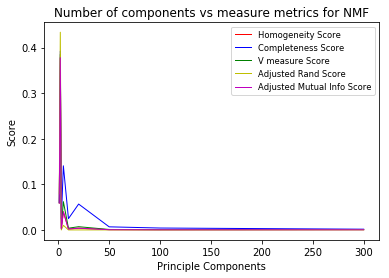

In [7]:
### QUESTION 5
# NMF Part

from sklearn.decomposition import NMF

nmf_scores = [[],[],[],[],[]]

for i in range(0,len(n_components)):
    k = n_components[i]
    nmf =  NMF(n_components=k)
    tfidfVectors_trunc = nmf.fit_transform(tfidfVectors.toarray())
    km = KMeans(n_clusters = 2, init = 'k-means++', random_state=0, max_iter = 1000 , n_init = 30).fit(tfidfVectors_trunc)
    
    nmf_scores[0].append(metrics.homogeneity_score(labels, km.labels_))
    nmf_scores[1].append(metrics.completeness_score(labels, km.labels_))
    nmf_scores[2].append(metrics.v_measure_score(labels, km.labels_))
    nmf_scores[3].append(metrics.adjusted_rand_score(labels, km.labels_))
    nmf_scores[4].append(metrics.adjusted_mutual_info_score(labels, km.labels_))
    
plt.figure()
color = ['r', 'b', 'g', 'y', 'm']
plt.plot(n_components, nmf_scores[0], color=color[0], lw=1, label='Homogeneity Score')
plt.plot(n_components, nmf_scores[1], color=color[1], lw=1, label='Completeness Score')
plt.plot(n_components, nmf_scores[2], color=color[2], lw=1, label='V measure Score')
plt.plot(n_components, nmf_scores[3], color=color[3], lw=1, label='Adjusted Rand Score')
plt.plot(n_components, nmf_scores[4], color=color[4], lw=1, label='Adjusted Mutual Info Score')
#pyplot.xlim([0.0, 350])
#pyplot.ylim([0.0, 1.0])
plt.xlabel('Principle Components')
plt.ylabel('Score')
plt.title('Number of components vs measure metrics for NMF')
plt.legend(loc='upper right', fontsize='small')
plt.show()


In [91]:
#Best r for SVD:
n_components = [1,2,3,5,10,20,50,100,300]
l = [np.argmax(i) for i in svd_scores]
best_r = n_components[max(set(l), key=l.count)]
print('Best r for SVD: %d' % best_r)

Best r for SVD: 3


In [92]:
#Best r for NMF:
n_components = [1,2,3,5,10,20,50,100,300]
l = [np.argmax(i) for i in nmf_scores]
best_r = n_components[max(set(l), key=l.count)]
print('Best r for NMF: %d' % best_r)

Best r for NMF: 2


Homogeneity: 0.400
Completeness: 0.438
V-measure: 0.418
Adjusted Rand-Index: 0.408
Adjusted Mutual Information Score: 0.400
Contingency Table: 
 [[1371 2532]
 [3928   51]]


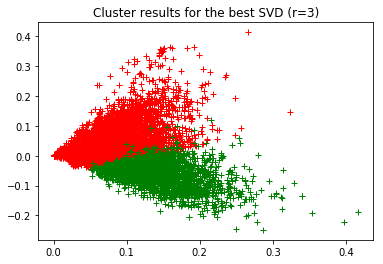

In [159]:
#Question7: (a)
# SVD - the best r for SVD is 3

tfidf = tfidfVectors
nclusters = 2
best_r = 3

svd = TruncatedSVD(n_components=best_r, random_state=42)
tfidfVectors_svd = svd.fit_transform(tfidf)
km = KMeans(n_clusters = nclusters, init = 'k-means++', random_state=0, max_iter = 1000 , n_init = 30).fit(tfidfVectors_svd)
    
svd2 = TruncatedSVD(n_components=2)
X_svd2 = svd2.fit_transform(tfidfVectors_svd)

svd2_bestr = evaluate(labels, km.labels_)

x1 = X_svd2[km.labels_==0][:, 0]
y1 = X_svd2[km.labels_==0][:, 1]
plt.plot(x1, y1, 'r+', label='Class 1')
    
x2 = X_svd2[km.labels_==1][:, 0]
y2 = X_svd2[km.labels_==1][:, 1]
plt.plot(x2, y2, 'g+', label='Class 2')
plt.title("Cluster results for the best SVD (r=3)")
plt.plot()
plt.show()


Homogeneity: 0.378
Completeness: 0.392
V-measure: 0.385
Adjusted Rand-Index: 0.434
Adjusted Mutual Information Score: 0.378
Contingency Table: 
 [[3693  210]
 [1136 2843]]


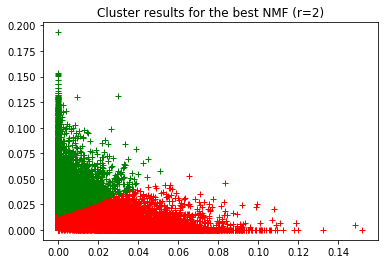

In [97]:
#Question7: (a)
# NMF - the best r for NMF is 2

tfidf = tfidfVectors
nclusters = 2
best_r = 2

nmf = NMF(n_components=best_r)
tfidfVectors_nmf = nmf.fit_transform(tfidf)
km = KMeans(n_clusters = nclusters, init = 'k-means++', random_state=0, max_iter = 1000 , n_init = 30).fit(tfidfVectors_nmf)

nmf_bestr = evaluate(labels, km.labels_)
#nmf2 = TruncatedSVD(n_components=2)
#X_nmf2 = nmf2.fit_transform(tfidfVectors_trunc)
    
x1 = tfidfVectors_nmf[km.labels_==0][:, 0]
y1 = tfidfVectors_nmf[km.labels_==0][:, 1]
plt.plot(x1, y1, 'r+')
    
x2 = tfidfVectors_nmf[km.labels_==1][:, 0]
y2 = tfidfVectors_nmf[km.labels_==1][:, 1]
plt.plot(x2, y2, 'g+')
plt.title("Cluster results for the best NMF (r=2)")
plt.show()

Homogeneity: 0.294
Completeness: 0.332
V-measure: 0.312
Adjusted Rand-Index: 0.302
Adjusted Mutual Information Score: 0.294
Contingency Table: 
 [[2256 1647]
 [ 129 3850]]


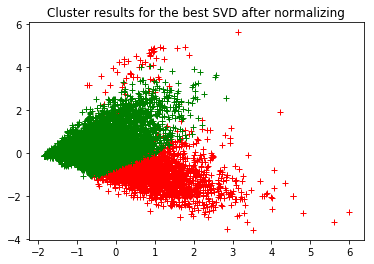

Homogeneity: 0.450
Completeness: 0.470
V-measure: 0.460
Adjusted Rand-Index: 0.505
Adjusted Mutual Information Score: 0.450
Contingency Table: 
 [[1023 2880]
 [3861  118]]


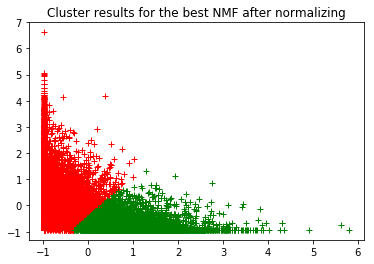

In [139]:
#Question8- Method 1: Unit Variance

# SVD
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
tfidfVectors_svd_method1 = scaler.fit_transform(tfidfVectors_svd)
km.fit(tfidfVectors_svd_method1)
svd_method1 = evaluate(labels, km.labels_)

x1 = tfidfVectors_svd_method1[km.labels_==0][:, 0]
y1 = tfidfVectors_svd_method1[km.labels_==0][:, 1]
plt.plot(x1, y1, 'r+')
    
x2 = tfidfVectors_svd_method1[km.labels_==1][:, 0]
y2 = tfidfVectors_svd_method1[km.labels_==1][:, 1]  
plt.plot(x2, y2, 'g+')
plt.title("Cluster results for the best SVD after normalizing")
plt.show()


# NMF
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
tfidfVectors_nmf_method1 = scaler.fit_transform(tfidfVectors_nmf)
km.fit(tfidfVectors_nmf_method1)
nmf_method1 = evaluate(labels, km.labels_)

x1 = tfidfVectors_nmf_method1[km.labels_==0][:, 0]
y1 = tfidfVectors_nmf_method1[km.labels_==0][:, 1]
plt.plot(x1, y1, 'r+')
    
x2 = tfidfVectors_nmf_method1[km.labels_==1][:, 0]
y2 = tfidfVectors_nmf_method1[km.labels_==1][:, 1]
plt.plot(x2, y2, 'g+')
plt.title("Cluster results for the best NMF after normalizing")
plt.show()

Homogeneity: 0.469
Completeness: 0.481
V-measure: 0.475
Adjusted Rand-Index: 0.542
Adjusted Mutual Information Score: 0.469
Contingency Table: 
 [[ 878 3025]
 [3817  162]]


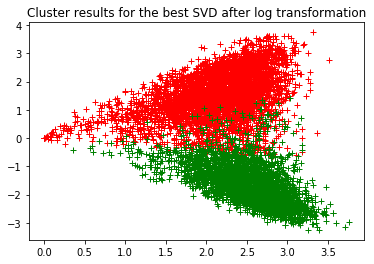

Homogeneity: 0.480
Completeness: 0.487
V-measure: 0.484
Adjusted Rand-Index: 0.571
Adjusted Mutual Information Score: 0.480
Contingency Table: 
 [[ 736 3167]
 [3751  228]]


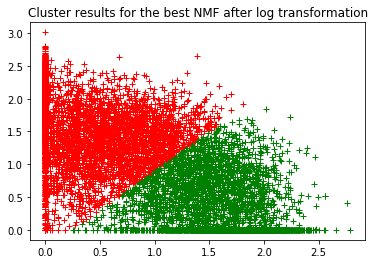

In [140]:
# Question8- Method 2: Log

def log_function (x):
    c = 0.01
    temp = np.sign(x) * (np.log(np.absolute(x) + c) - np.log(c))
    return temp
    
# SVD
tfidfVectors_svd_method2 = log_function(tfidfVectors_svd)
km.fit(tfidfVectors_svd_method2)
svd_method2 = evaluate(labels, km.labels_)

x1 = tfidfVectors_svd_method2[km.labels_==0][:, 0]
y1 = tfidfVectors_svd_method2[km.labels_==0][:, 1]
plt.plot(x1, y1, 'r+')
    
x2 = tfidfVectors_svd_method2[km.labels_==1][:, 0]
y2 = tfidfVectors_svd_method2[km.labels_==1][:, 1]  
plt.plot(x2, y2, 'g+')
plt.title("Cluster results for the best SVD after log transformation")
plt.show()


# NMF
tfidfVectors_nmf_method2 = log_function(tfidfVectors_nmf)
km.fit(tfidfVectors_nmf_method2)
nmf_method2 = evaluate(labels, km.labels_)

x1 = tfidfVectors_nmf_method2[km.labels_==0][:, 0]
y1 = tfidfVectors_nmf_method2[km.labels_==0][:, 1]
plt.plot(x1, y1, 'r+')
    
x2 = tfidfVectors_nmf_method2[km.labels_==1][:, 0]
y2 = tfidfVectors_nmf_method2[km.labels_==1][:, 1]
plt.plot(x2, y2, 'g+')
plt.title("Cluster results for the best NMF after log transformation")
plt.show()

Homogeneity: 0.461
Completeness: 0.461
V-measure: 0.461
Adjusted Rand-Index: 0.567
Adjusted Mutual Information Score: 0.461
Contingency Table: 
 [[3418  485]
 [ 487 3492]]


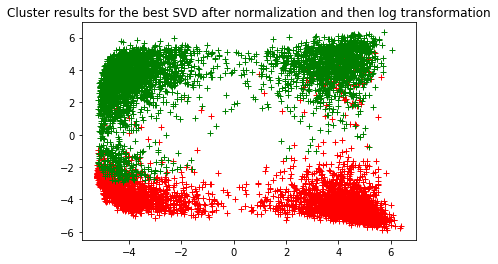

Homogeneity: 0.421
Completeness: 0.436
V-measure: 0.429
Adjusted Rand-Index: 0.487
Adjusted Mutual Information Score: 0.421
Contingency Table: 
 [[2895 1008]
 [ 183 3796]]


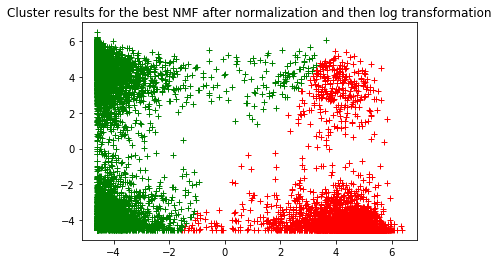

In [141]:
#Question8 - Method 3: Normalize and then Log

# SVD
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
tfidfVectors_svd_norm = preprocessing.scale(tfidfVectors_svd)
tfidfVectors_svd_method3 = log_function(tfidfVectors_svd_norm)
km.fit(tfidfVectors_svd_method3)
svd_method3 = evaluate(labels, km.labels_)

x1 = tfidfVectors_svd_method3[km.labels_==0][:, 0]
y1 = tfidfVectors_svd_method3[km.labels_==0][:, 1]
plt.plot(x1, y1, 'r+')
    
x2 = tfidfVectors_svd_method3[km.labels_==1][:, 0]
y2 = tfidfVectors_svd_method3[km.labels_==1][:, 1]  
plt.plot(x2, y2, 'g+')
plt.title("Cluster results for the best SVD after normalization and then log transformation")
plt.show()


# NMF
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
tfidfVectors_nmf_norm = preprocessing.scale(tfidfVectors_nmf)
tfidfVectors_nmf_method3 =log_function(tfidfVectors_nmf_norm)
km.fit(tfidfVectors_nmf_method3)
nmf_method3 = evaluate(labels, km.labels_)

x1 = tfidfVectors_nmf_method3[km.labels_==0][:, 0]
y1 = tfidfVectors_nmf_method3[km.labels_==0][:, 1]
plt.plot(x1, y1, 'r+')
    
x2 = tfidfVectors_nmf_method3[km.labels_==1][:, 0]
y2 = tfidfVectors_nmf_method3[km.labels_==1][:, 1]
plt.plot(x2, y2, 'g+')
plt.title("Cluster results for the best NMF after normalization and then log transformation")
plt.show()

Homogeneity: 0.414
Completeness: 0.423
V-measure: 0.418
Adjusted Rand-Index: 0.493
Adjusted Mutual Information Score: 0.414
Contingency Table: 
 [[ 916 2987]
 [3722  257]]


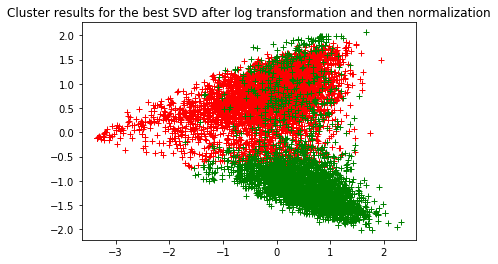

Homogeneity: 0.484
Completeness: 0.491
V-measure: 0.488
Adjusted Rand-Index: 0.574
Adjusted Mutual Information Score: 0.484
Contingency Table: 
 [[3172  731]
 [ 223 3756]]


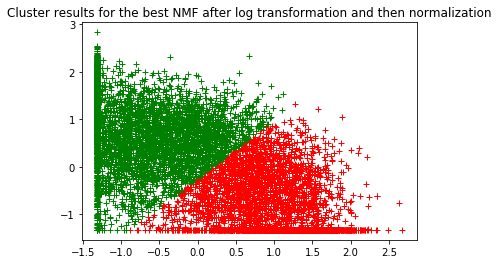

In [142]:
#Question8 - Method 4: Log and then Normalize

# SVD
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
tfidfVectors_svd_log = log_function(tfidfVectors_svd)
tfidfVectors_svd_method4 = preprocessing.scale(tfidfVectors_svd_log)
km.fit(tfidfVectors_svd_method4)
svd_method4 = evaluate(labels, km.labels_)

x1 = tfidfVectors_svd_method4[km.labels_==0][:, 0]
y1 = tfidfVectors_svd_method4[km.labels_==0][:, 1]
plt.plot(x1, y1, 'r+')
    
x2 = tfidfVectors_svd_method4[km.labels_==1][:, 0]
y2 = tfidfVectors_svd_method4[km.labels_==1][:, 1]  
plt.plot(x2, y2, 'g+')
plt.title("Cluster results for the best SVD after log transformation and then normalization")
plt.show()


# NMF
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
tfidfVectors_nmf_log = log_function(tfidfVectors_nmf)
tfidfVectors_nmf_method4 = preprocessing.scale(tfidfVectors_nmf_log)

km.fit(tfidfVectors_nmf_method4)
nmf_method4 = evaluate(labels, km.labels_)

x1 = tfidfVectors_nmf_method4[km.labels_==0][:, 0]
y1 = tfidfVectors_nmf_method4[km.labels_==0][:, 1]
plt.plot(x1, y1, 'r+')
    
x2 = tfidfVectors_nmf_method4[km.labels_==1][:, 0]
y2 = tfidfVectors_nmf_method4[km.labels_==1][:, 1]
plt.plot(x2, y2, 'g+')
plt.title("Cluster results for the best NMF after log transformation and then normalization")
plt.show()

In [160]:
evaluate_svds = [svd_method1,svd_method2,svd_method3,svd_method4]
evaluate_nmfs = [nmf_method1,nmf_method2,nmf_method3,nmf_method4]

new_index = ['svd_method'+ str(i) for i in range(1,5)] + ['nmf_method'+ str(i) for i in range(1,5)]
pd.DataFrame(evaluate_svds+evaluate_nmfs, columns=["Homogeneity", "Completeness" ,"V-measure", "Adjusted Rand-Index","Adjusted Mutual Information Score"], index=new_index)




,Homogeneity,Completeness,V-measure,Adjusted Rand-Index,Adjusted Mutual Information Score
svd_method1,0.293816,0.332186,0.311825,0.301704,0.293751
svd_method2,0.468654,0.481412,0.474947,0.541797,0.468605
svd_method3,0.461150,0.461147,0.461149,0.567500,0.461098
svd_method4,0.413721,0.423294,0.418453,0.493246,0.413667
nmf_method1,0.450113,0.469670,0.459684,0.504719,0.450063
nmf_method2,0.480427,0.487161,0.483771,0.570563,0.480379
nmf_method3,0.421216,0.436406,0.428676,0.486850,0.421163
nmf_method4,0.484340,0.491129,0.487711,0.574403,0.484293


In [161]:
for item in evaluate_svds+evaluate_nmfs :
    print(item)
    

[0.29381586574349766, 0.3321863777413059, 0.3118251705327239, 0.30170376409912836, 0.2937512113569467]
[0.46865379035275007, 0.48141241477594726, 0.4749474335360781, 0.5417968133013686, 0.4686051449900002]
[0.46115013009661115, 0.46114695998438987, 0.46114854503505237, 0.567499567363035, 0.46109762817674693]
[0.41372089783173216, 0.423294373964969, 0.41845288692998533, 0.49324554129591314, 0.4136672233766444]
[0.4501134804473924, 0.4696703776064488, 0.45968401483972277, 0.5047193470020812, 0.45006313740702136]
[0.48042661621939475, 0.48716126145565325, 0.48377050145911904, 0.5705629170776363, 0.48037904889511857]
[0.421215744966264, 0.4364058871861851, 0.4286762926383757, 0.48685001518752913, 0.4211627564288457]
[0.48433988021168833, 0.4911293817856563, 0.48771100271359, 0.574403344722863, 0.4842926711496002]
